# Final Team Project: House Sales

By: Hannah Rueter, Jacob Moore, Aishwarya Kuduvalli <br> Shiley-Marcos School of Engineering, University of San Diego <br> ADS-500B: Data Science Programming <br> Dr. Parastoo Qarabaqi

## Sections
- Data Importing and Pre-processing - Hannah
- Data Analysis & Visualization - Jacob, Aishwarya
- Data Analytics - Aishwarya

## Data Importing and Pre-processing

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "house_sales.csv"

df = pd.read_csv(file_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Importing the Dataset

The dataset was imported using Python’s Pandas library. We used the pd.read_csv() function to load the house_sales.csv file from its filepath into a Pandas DataFrame for analysis, using the variable df. The dataset is stored as a CSV file, a plain-text format commonly used for tabular data. The dataset contains 21,613 rows of individual house sale records, with 21 columns that describe each property and its sale. With this amount of data we can consider it a medium sized dataset and be comfortable doing exploratory analysis and further predictive modeling.

### Characteristics of the Dataset

The dataset contains a mix of numeric, integer, floating-point, and categorical-like variables. ID is an integer type, unique for each house sale. Date is an object in string format, representing the transaction date-time. Price is a float, which represents the sale price of the property. Bedrooms and bathrooms categories are in float format, although they will need to be rounded down in the cleaning process. The lot size categories include sqft_living, sqft_lot, sqft_above, and sqft_basement, which are both integer and float formats. The number of floors a home has is in float format, another category that will be handled before further modeling. Some quality indicators like waterfront, view, condition, and grade, are in integer format. Construction and renovation years are indicated by yr_renovated and yr_built, respectively, in integer format. The zipcode is in integer format as well. The latitude and longitude are also included, but in float type. Lastly, the lot size of neighboring homes are known by the variables sqft_living15 and sqft_lot15, both in float type. Currently the data has outliers, missing counts, but is rich in structural features and geographical indicators.

In [14]:
# How many columns and rows there are in the dataset
print("Dimensions:", df.shape)

# Column names and data types
print("\nData Types:")

# Statistical summary
print("\nSummary:")
print(df.describe())

# See the first few rows
df.head()

Dimensions: (21613, 21)

Data Types:

Summary:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  20479.000000  20545.000000  20503.000000   
mean   4.580302e+09  5.400881e+05      3.372821      2.113507   2081.073697   
std    2.876566e+09  3.671272e+05      0.930711      0.768913    915.043176   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.500000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.056900e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.517982e+04      1.494309      0.007542      0.234303      3.409430   
std 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Cleaning, Wrangling, and Handling Missing Data

**Missing data**

In order to clean and handle missing data, we must first run the is.null().sum() function to determine which columns need cleaning. After running this function, we can see the totals of how many in each column is missing, and determine whether to drop them or not. Columns like yr_renovated and sqft_basement may have many 0’s, but they are meaningful to the dataset so we should not drop them. The is.null() function returned 4 columns with missing values under 1,200, so we can focus on the four columns that have missing values, which are columns: bedrooms, bathrooms, sqft_living, and sqft_lot. 

For numeric continuous features of homes, we will impute them with the median. The median is not sensitive to outliers, and is recommended for skewed distributions such as sqdt, lot size, and bathrooms. With columns such as floors, view, condition, and grade, we will fill with the mode. A value of 0 would be invalid for these columns as well since they are continuous measures of homesize and structure, so we want to make sure to fix those in this step with the same method. Using the median better preserves the underlying distribution of real estate features than the mean.

**Removing outliers**

To address extreme and unrealistic values, outliers were removed using rule-based thresholds. Properties with more than 10 bedrooms, more than 10,000 square feet of living, or lots larger than 200,000 square feet were eliminated from the dataset because they could unduly influence the analysis as atypical observations. For renovation year, a value of 0 indicates that the property has never been renovated. Because 0 is not an actual year, these values were recorded as missing (NaN) to represent the absence of a renovation year, in order to distinguish homes that were renovated from those that were not. This ensures that the field can be interpreted correctly in statistical summaries and predictive modeling later on.

In [15]:
# Determine which columns need cleaning
df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [17]:
# Use the median for numeric column missing values
fill_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

for col in fill_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical-like numeric columns with mode
cat_cols = ['floors', 'waterfront', 'view', 'condition', 'grade']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert date into real datetime format
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%dT%H%M%S')

In [18]:
# Replace impossible values
df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bedrooms'].median())

# Confirm no nulls are left
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
# Remove outliers
df = df[df['bedrooms'] <=10]
df = df[df['sqft_living'] <= 10000]
df = df[df['sqft_lot'] <= 200000]

import numpy as np

# Handle renovation years for those that have not been renovated yet
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)
df['yr_renovated'] = pd.to_numeric(df['yr_renovated'])

In [20]:
# Confirm data has been transformed 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21359 non-null  int64         
 1   date           21359 non-null  datetime64[ns]
 2   price          21359 non-null  float64       
 3   bedrooms       21359 non-null  float64       
 4   bathrooms      21359 non-null  float64       
 5   sqft_living    21359 non-null  float64       
 6   sqft_lot       21359 non-null  float64       
 7   floors         21359 non-null  float64       
 8   waterfront     21359 non-null  int64         
 9   view           21359 non-null  int64         
 10  condition      21359 non-null  int64         
 11  grade          21359 non-null  int64         
 12  sqft_above     21359 non-null  int64         
 13  sqft_basement  21359 non-null  int64         
 14  yr_built       21359 non-null  int64         
 15  yr_renovated   899 non-n

In [21]:
df.to_csv("cleaned_house_sales.csv", index=False)

### Aggregation, Normalization, and Feature Construction

In order to summarize key trends in the dataset, a few aggregation techniques were applied. The mean home price was computed for each zipcode to identify geographic differences in housing values. Next, homes were grouped by the number of bedrooms, and the average price was calculated for each group. This provides insight into how location and home characteristics influence housing prices.

New features were engineered in order to improve the interpretability of future models. From the transaction date, we can derive year and month sold in order to better understand purchasing patterns. House age can be determined from looking at the difference between the sale year and the year built, and we can measure how long it has been since a property has last been renovated with a new variable years_since_renovation. From this recent addition, we can create a binary variable renovated_flag, to indicate whether a renovation has occurred. Additional structural features include total_sqft, which combines above-ground and basement area, and price_per_sqft which normalizes price relative to living space. These constructed features provide valuable predictors for model development and exploratory analysis.

In [22]:
# Aggregate average price by zipcode
avg_price_zip = df.groupby('zipcode')['price'].mean().reset_index()
avg_price_zip.head()

# Aggregate average price of home by amount of bedrooms
avg_price_by_bdrms = df.groupby('bedrooms')['price'].mean().reset_index()
avg_price_by_bdrms

,bedrooms,price
0,1.0,3.189623e+05
1,2.0,4.000886e+05
2,3.0,4.711163e+05
3,4.0,6.328564e+05
4,5.0,7.879076e+05
5,6.0,7.979985e+05
6,7.0,9.551476e+05
7,8.0,1.138833e+06
8,9.0,9.528000e+05
9,10.0,8.193333e+05


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['sqft_living', 'sqft_lot', 'price']
df_standardized = df.copy()
df_standardized[scaled_cols] = scaler.fit_transform(df[scaled_cols])

df_standardized.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,-0.875610,3.0,1.00,-1.005596,-0.343014,1.0,0,0,...,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,0.000578,3.0,2.25,0.576543,-0.248094,2.0,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,-0.991751,2.0,1.00,-1.472270,-0.083654,1.0,0,0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,0.183521,4.0,3.00,-0.117777,-0.381769,1.0,0,0,...,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,-0.077035,3.0,2.00,-0.436481,-0.198130,1.0,0,0,...,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [24]:
# Scaled dataset saved as new CSV file
df_standardized.to_csv("standardized_house_sales.csv", index=False)

In [25]:
#----Time Features----
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

#----Age of House----
df['house_age'] = df['year_sold'] - df['yr_built']

#----Age Since Renovation----
df['years_since_renovation'] = df['year_sold'] - df['yr_renovated']

# Houses not renovated will be NaN

#----Renovation Flag----
df['renovated_flag'] = df['yr_renovated'].notna().astype(int)

#----Total Square Footage----
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

#----Price Per Square Foot ----
df['price_per_sqft'] = df['price'] / df['sqft_living']

## Data Analysis and Visualization

### Categorical, Ordinal, and Numerical Variables

Within the dataset, variables were classified according to their respective data types to assist in exploratory analysis and modelling.

- Categorical variables: zipcode
- Ordinal variables: waterfront, view, condition, grade
- Numerical variables: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15, yr_sold

Categorical variables include zipcode, which functions as an identifier as opposed to a true numerical variable.  Waterfront, view, condition, and grade, were marked as ordinal variables because they either use a binary field indicating the presence or absence of the listed attributes, or represent an ordered measure of quality. The remaining variables were categorized as numerical since they consist of measurable values that will be useful in the model. date, originally a categorical variable, was converted into the numerical variable yr_sold to be more effectively incorporated into the analysis.

In [26]:
df = pd.read_csv('cleaned_house_sales.csv')

# Converting date [sold] to year sold

df['yr_sold'] = pd.to_datetime(df['date']).dt.year
df = df.drop(columns=['date'])

# List of numerical variables

numerical = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
             'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold']

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,2015


### Measures of Centrality and Distribution

Measures of central tendency and distribution were determined by applying the describe() function to the 'numerical' list, which provided the mean, median/quartiles, minimum/maximum, and standard deviation. Mode, range, and variance were also calculated separately and added to the table. From these results alone, significant variation among house sale prices (price). Similarly, sqft_living, sqft_lot, and sqft_above also present high standard deviations and large ranges, suggesting substantial spread in housing size.

**House sale price**

The house sale prices mean of \\$537,791.634 is higher than the median of \\$450,000, indicating a positive/right skew in distribution. These observations are further supported by the histogram and boxplot below. From the histogram, there appears to be a strong right skew, with significant majority of houses falling between roughly \\$250,000 to \\$750,000, but the end portion stretches well beyond these values. The boxplot follows a similar pattern with a comparatively small interquartile range (IQR), a longer upper whisker, and several higher priced outliers. Although outliers were removed based on house size, variations in price continue to exist. Both plots suggest that the distribution of house prices is generally concentrated to a specific range, but there are higher value properties creating a skew.

In [29]:
# Show statistical measures 

descriptivestats = df[numerical].describe()

# Including range
range = df[numerical].max() - df[numerical].min()
descriptivestats.loc['range'] = range

# Including mode
mode = df[numerical].mode().iloc[0]
descriptivestats.loc['mode'] = mode

# Including variance
variance = df[numerical].var()
descriptivestats.loc['variance'] = variance

round(descriptivestats, 3).T

,count,mean,std,min,25%,50%,75%,max,range,mode,variance
price,21359.0,537791.634,360775.913,75000.000,320000.000,450000.000,640000.000,6885000.000,6810000.000,450000.000,1.301593e+11
bedrooms,21359.0,3.353,0.884,1.000,3.000,3.000,4.000,10.000,9.000,3.000,7.820000e-01
bathrooms,21359.0,2.116,0.744,0.500,1.750,2.250,2.500,7.750,7.250,2.500,5.530000e-01
sqft_living,21359.0,2063.474,878.578,290.000,1450.000,1920.000,2500.000,9640.000,9350.000,1920.000,7.718997e+05
sqft_lot,21359.0,11403.058,16772.463,520.000,5108.000,7620.000,10223.500,199940.000,199420.000,7620.000,2.813155e+08
floors,21359.0,1.493,0.540,1.000,1.000,1.500,2.000,3.500,2.500,1.000,2.920000e-01
sqft_above,21359.0,1778.473,815.513,290.000,1190.000,1560.000,2200.000,8860.000,8570.000,1300.000,6.650621e+05
sqft_basement,21359.0,291.082,439.747,0.000,0.000,0.000,560.000,4820.000,4820.000,0.000,1.933774e+05
yr_built,21359.0,1970.859,29.416,1900.000,1951.000,1974.000,1997.000,2015.000,115.000,2014.000,8.653180e+02
yr_renovated,899.0,1995.868,15.577,1934.000,1987.000,2000.000,2007.000,2015.000,81.000,2014.000,2.426290e+02


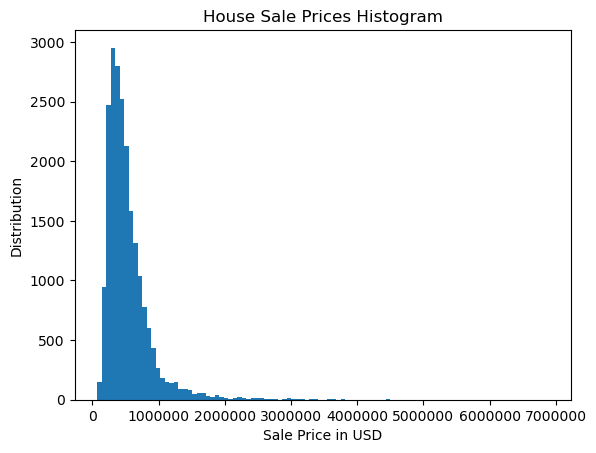

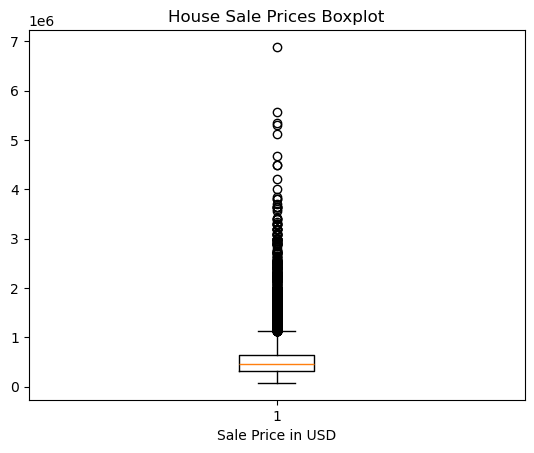

In [30]:
# House Sale Prices Histogram

plt.hist(df['price'], bins=100)
plt.title("House Sale Prices Histogram")
plt.xlabel("Sale Price in USD")
plt.ylabel("Distribution")
plt.ticklabel_format(style='plain') 
plt.show()

# House Sale Prices Boxplot

plt.boxplot(df['price'])
plt.title("House Sale Prices Boxplot")
plt.xlabel("Sale Price in USD")
plt.show()

**Distribution of other numerical variables**

Histograms were also created for a select few numerical variables, including sqft_living, sqft_lot, and yr_built. These variables were assumed to be particularly relevant to this analysis as they involve key characteristics of housing such as the size of the property and age. From the visualizations, similar to house sale price, both sqft_living and sqft_lot are strongly right/positively skewed, sqft_lot more so. In the sqft_living histogram, there is a sharp peak around the 2,000 sq. ft range, likely indicating a standardized home size. The yr_built histogram in contrast has a more uneven distribution but is generally left skewed, suggesting a boom in housing development over the years, but especially during specific short periods of time. 

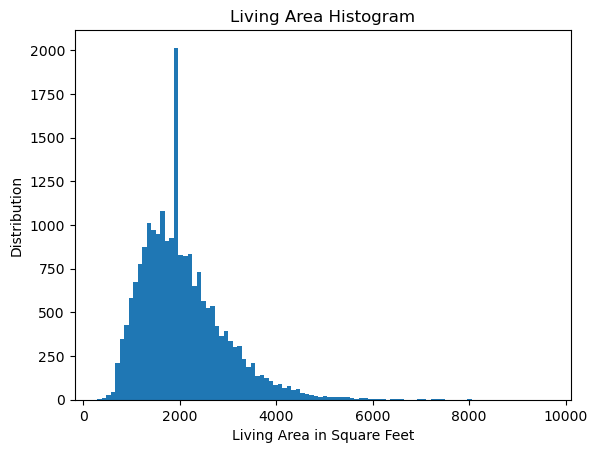

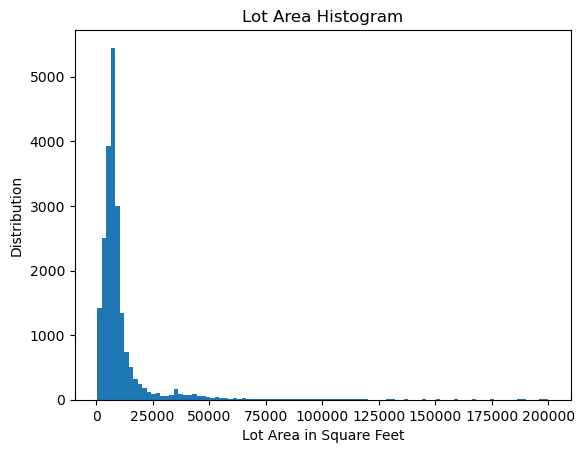

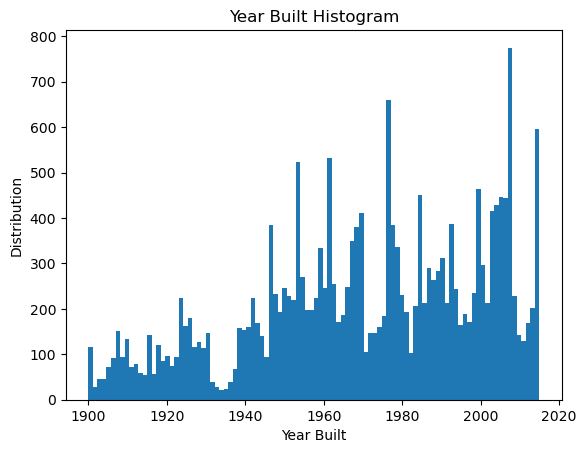

In [37]:
# sqft_living Histogram

plt.hist(df['sqft_living'], bins=100)
plt.title("Living Area Histogram")
plt.xlabel("Living Area in Square Feet")
plt.ylabel("Distribution")
plt.ticklabel_format(style='plain') 
plt.show()

# sqft_lot Histogram

plt.hist(df['sqft_lot'], bins=100)
plt.title("Lot Area Histogram")
plt.xlabel("Lot Area in Square Feet")
plt.ylabel("Distribution")
plt.ticklabel_format(style='plain') 
plt.show()

# yr_built histogram

plt.hist(df['yr_built'], bins=100)
plt.title("Year Built Histogram")
plt.xlabel("Year Built")
plt.ylabel("Distribution")
plt.ticklabel_format(style='plain') 
plt.show()

### Correlations

### Exploratory Analysis

## Data Analytics

### Supervised vs. Unsupervised Learning Method

The dataset presents a clear goal of predicting house sale price, and therefore facilitates the need for a *supervised learning method*. Supervised learning is ideal in this scenario because the true output (house sale price) is provided and can be compared against the model's predictions to determine its effectiveness. Sale price (price) then, serves as the dependent or target variable. The model's independent variables are made up of the remaining attributes that involve the property's structure and location. 

From the correlation matrix, multiple variables posed a risk of multicollinearity. In particular, sqft_living and sqft_above, sqft_living and sqft_living15, as well as sqft_lot and sqft_lot15 demonstrated strong positive correlation (r = 0.849603, r = 0.742807, and r = 0.716402, respectively). To improve reliability, sqft_above, sqft_living15, and sqft_lot15 were omitted in the final model. The variable zipcode, a categorical variable, was also removed as the effect of location is already accounted for with latitude and longitude. 

**Dependent and independent variables**

- Dependent variable: price
- Independent variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, yr_sold


### Developing the Model (Training, Testing, Evaluating Results)

After determining the relevant variables for the regression model, the id column was removed and all NaN values were replaced with 0 to prevent issues with execution. The dataset was then split into training (75%) and testing (25%) so the model could be trained with one set and be measured in accuracy with another. The random_state value was included to ensure the model is trained with the same split with every run, allowing for repeatable results. For the model itself, an intercept was added through sm.add_constant(). The multiple regression model was then developed with statsmodels' Ordinary Least Squares (OLS), summarized in the table above. 

The OLS regression results produced an R-squared value of 0.632, indicating that 63.2% of house sale price variance can be explained by the model. The regression equation is made up of variables by a corresponding coefficient and a constant (intercept) as seen in the coef column. The sum of these weighted variables and the intercept creates the predicted value. 

**Accuracy metrics**

The test mean absolute error was used to assess accuracy of the model. It was determined by evaluating the average amount of difference between the predicted house prices on the test set and actual house prices. The value indicates an average error of \\$138,525.40. With the knowledge that house sale prices in the dataset are varied, we can assume that the model is a fair predictor of price, but it is necessary to proceed with caution due to its limitations. 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# Removing ID and converting NaN to 0

df = df.drop(columns=['id'])
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Dependent & independent variables

y = df['price']
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
     'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'yr_sold']]

# Splitting for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=222)

# Count # of rows of train and test sets

trainshape = X_train.shape[0]
testshape = X_test.shape[0]

# Train/test percentages

trainpercent = trainshape / (trainshape + testshape)
testpercent = testshape / (trainshape + testshape)
print("Train size:", trainpercent)
print("Test size:", testpercent)

Train size: 0.7499882953321785
Test size: 0.2500117046678215


In [39]:
# Multiple regression model

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_results = sm.OLS(y_train, X_train).fit()
X_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1961.
Date:                Sat, 06 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:38:24   Log-Likelihood:            -2.1929e+05
No. Observations:               16019   AIC:                         4.386e+05
Df Residuals:                   16004   BIC:                         4.387e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.953e+07   7.54e+06    -13.207      0.000   -1.14e+08   -8.48e+07
bedrooms      -3.409e+04   2398.994    -14.210      0.000   -3.88e+04   -2.94e+04
bathrooms       6.74e+04   3834.418     17.578      0.000    5.99e+04    7.49e+04
sqft_living     254.2861      3.318     76.645      0.000     247.783     260.789
sqft_lot         -0.1527      0.111     -1.381      0.167      -0.369       0.064
floors         2.407e+04   4353.380      5.529      0.000    1.55e+04    3.26e+04
waterfront      4.61e+05   2.25e+04     20.462      0.000    4.17e+05    5.05e+05
view           7.512e+04   2614.115     28.737      0.000       7e+04    8.02e+04
condition      3.365e+04   2875.124     11.705      0.000     2.8e+04    3.93e+04
sqft_basement   -52.9402      5.210    -10.160      0.000     -63.153     -42.727
yr_built      -1588.9484     85.093    -18.673      0.000   -1755.739   -1422.158
yr_renovated     24.6865      4.493      5.494      0.000      15.879      33.494
lat            6.658e+05   1.27e+04     52.295      0.000    6.41e+05    6.91e+05
long          -1.068e+05   1.44e+04     -7.412      0.000   -1.35e+05   -7.86e+04
yr_sold        2.868e+04   3613.155      7.938      0.000    2.16e+04    3.58e+04
==============================================================================
Omnibus:                    10311.518   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           312236.691
Skew:                           2.626   Prob(JB):                         0.00
Kurtosis:                      23.982   Cond. No.                     8.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Test Mean Absolute Error

predicted = X_results.predict(X_test)
meanabserror = mean_absolute_error(y_test, predicted)
print("Test mean absolute error:", round(meanabserror, 4))

Test mean absolute error: 138525.397
